# Descriptive (Spatial) Analytics - Idle Time

To account for large time gaps when the driver does not work, we introduce a threshold of xx to consider only significant idle periods. In the following we present the steps we followed to calculate the average idle time:

1. **Sorting the Trips in ascending order for each taxi:** We sort the trips in ascending order for each taxi and start time.

2. **Identifying the Idle Periods:** For each driver, we find the time gap between the end time of one trip and the start time of the next trip. 

3. **Introducing a threshold of xx hours:** If the time gap exceeds the defined threshold of xx minutes (i.e., xx hours), we can ignore this time gaps, because the driver is not working at that time. By introducing a threshold, you can exclude the large time gaps when the driver does not work from the calculation of the average idle time. This approach provides a more accurate representation of the idle time during active working periods.

4. **Summing Idle Times up:** We add up all the significant idle times calculated after step 3 for all drivers to get the total idle time.

5. **Counting the Idle Periods:** We count the number of significant idle periods observed in step 2. This will be the total number of significant idle periods for all drivers.

6. **Calculating the Average:** We divide the total idle time by the number of significant idle periods to find the average idle time per significant idle period.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

import descriptive as desc

c:\Users\Fabi\OneDrive\Fabian\Uni\Uni Köln\Semester II\Advanced Analytics & Applications\project\AAA_2023_AdvancedPythonPandas\Task 2 - Descriptive (Spatial) Analysis\descriptive.py:16: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  exploded_city_bounding_poly = gdf.explode()


In [2]:
# import datasets
df_chicago = pd.read_csv("..\data\datasets\df_chicago.csv.zip")

In [3]:
#prepare later needed features and variables
df_chicago["Trip_Minutes"] = np.floor(df_chicago["Trip_Seconds"] / 60)
df_chicago["Pickup_C->Dropoff_C"] = df_chicago["Pickup_Census_Tract"].astype(str)+"->"+df_chicago["Dropoff_Census_Tract"].astype(str)

palette = "turbo"

In [4]:
# Sort trip data by start time
df = df_chicago.sort_values(by=['Taxi_ID', 'Original_Trip_Start_Timestamp'])

# Reset index
df.reset_index(drop=True, inplace=True)

# defining a threshold in minutes
threshold_minutes = 300 # 6 hours

# Calculate time differences using vectorized operations
time_diff = (
    pd.to_datetime(df["Original_Trip_Start_Timestamp"]) -
    pd.to_datetime(df["Original_Trip_End_Timestamp"].shift())
).dt.total_seconds() / 60

# Set "Idle Time Minutes" column based on the threshold
df["Idle Time Minutes"] = np.where(
    (time_diff > threshold_minutes) & 
    (df["Taxi_ID"] == df["Taxi_ID"].shift()), time_diff, 0)

# Set "Idle Period" column based on condition using np.where
df["Idle Period"] = np.where(
    (df["Idle Time Minutes"] < threshold_minutes) &
    (df["Taxi_ID"] == df["Taxi_ID"].shift()),
    1, 0
)

# Set "Idle Time Minutes" column based on the threshold
df["Idle Time Minutes"] = np.where(
    (time_diff <= threshold_minutes) &
    (df["Taxi_ID"] == df["Taxi_ID"].shift()), time_diff, 0)

df.head()

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,wind_direction,wind_speed,description,h3_hex_id_high_res,h3_hex_id_medium_res,h3_hex_id_low_res,Trip_Minutes,Pickup_C->Dropoff_C,Idle Time Minutes,Idle Period
0,7c5f446862febec7ff725c9dbfda3f53d2b58cff,001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...,2013-07-12 16:00:00,2013-07-12 16:00:00,1560.0,6.0,NaN,NaN,6.0,15.0,...,59.0,3.0,sky is clear,882664c163fffff,872664c16ffffff,862664c17ffffff,26.0,nan->nan,0.0,0
1,106f37011cf2e3a4164bb03a8e33f8a77ad2b31b,001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...,2013-07-12 19:00:00,2013-07-12 19:00:00,1620.0,5.8,1.703183e+10,1.703108e+10,6.0,8.0,...,63.0,4.0,sky is clear,882664c161fffff,872664c16ffffff,862664c17ffffff,27.0,17031832000.0->17031081500.0,165.0,1
2,7797e40db82db8850c092c84b3f2c3b8fec632b1,001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...,2013-07-12 20:00:00,2013-07-12 20:00:00,1200.0,3.8,1.703108e+10,1.703124e+10,8.0,24.0,...,0.0,4.0,sky is clear,882664c1e1fffff,872664c1effffff,862664c1fffffff,20.0,17031081201.0->17031241400.0,15.0,1
3,28fc5c3b06a7096764752e5b73e9451c7b96b5ee,001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...,2013-07-12 20:00:00,2013-07-12 20:00:00,720.0,3.1,1.703124e+10,1.703107e+10,24.0,7.0,...,0.0,4.0,sky is clear,882664cac3fffff,872664cacffffff,862664cafffffff,12.0,17031242200.0->17031071500.0,0.0,1
4,c51e93e5ce3e49ff3507992843e4c1998eb60a5f,001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...,2013-07-13 14:00:00,2013-07-13 14:00:00,480.0,1.4,NaN,NaN,31.0,28.0,...,17.0,1.0,sky is clear,882664cf61fffff,872664cf6ffffff,862664cf7ffffff,8.0,nan->nan,0.0,0


In [5]:
average_idle_time = df["Idle Time Minutes"].sum() / df["Idle Period"].sum()
print("The average idle time with a threshold value of",threshold_minutes,"minutes is: ",round(average_idle_time, 2))

The average idle time with a threshold value of 300 minutes is:  33.2


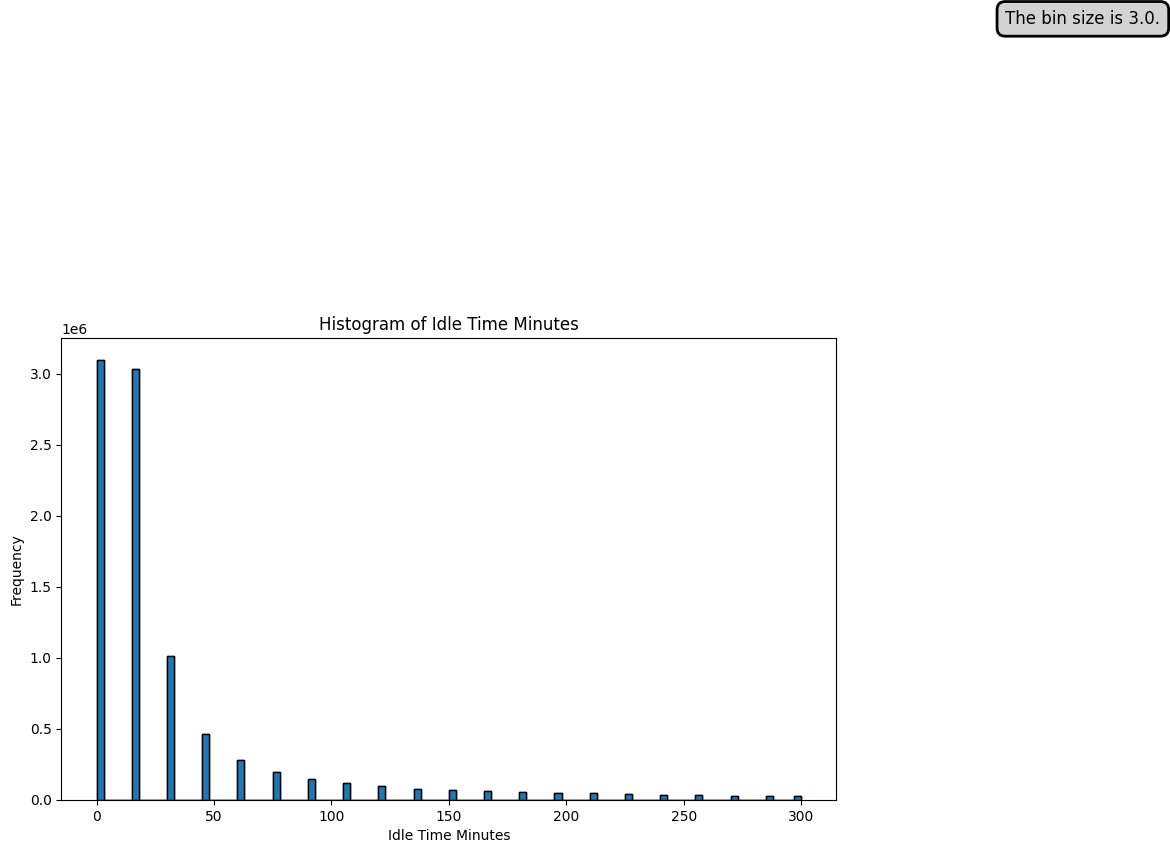

In [6]:
# Assuming df["Idle Time Minutes"] is a numeric column
idle_time_minutes = df["Idle Time Minutes"]

# Set the figure size (width, height) in inches
plt.figure(figsize=(10, 6))

# Plot the histogram and get bin edges
hist, bin_edges, _ = plt.hist(idle_time_minutes, bins=100, edgecolor='black', align='mid')

# Calculate the center positions of each bin
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the bin intervals
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), align='center', edgecolor='black')

plt.xlabel("Idle Time Minutes")
plt.ylabel("Frequency")
plt.title("Histogram of Idle Time Minutes")

# Add a border around the note
border_props = dict(boxstyle='round, pad=0.5', fc='lightgray', ec='black', lw=2)

# Add the note with the specified coordinates and border properties
plt.text(420, 5.5e6, f"The bin size is {bin_edges[1] - bin_edges[0]}.", fontsize=12, ha='center', va='center', color='black', bbox=border_props)

plt.show()


### Census Tract

In [7]:
# How many idle minutes were gathered per pickup census tract in total
grouped = df[["Pickup_Census_Tract", "Idle Time Minutes"]].groupby("Pickup_Census_Tract").sum().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Sum"})
print(grouped.tail())

                            Sum
Pickup_Census_Tract            
1.703108e+10          7020135.0
1.703108e+10         10176075.0
1.703108e+10         11412000.0
1.703132e+10         14081880.0
1.703184e+10         22400790.0


In [8]:
# How many idle minutes were gathered per dropoff census tract in total
grouped = df[["Dropoff_Census_Tract", "Idle Time Minutes"]].groupby("Dropoff_Census_Tract").sum().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Sum"})
print(grouped.tail())

                             Sum
Dropoff_Census_Tract            
1.703108e+10           8111550.0
1.703108e+10           8123790.0
1.703128e+10           8264595.0
1.703132e+10          11502705.0
1.703184e+10          19777695.0


In [9]:
# How many idle minutes were gathered per route between census tracts in total
grouped = df[["Pickup_C->Dropoff_C", "Idle Time Minutes"]].groupby("Pickup_C->Dropoff_C").sum().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Sum"})
print(grouped.tail())

                                     Sum
Pickup_C->Dropoff_C                     
17031839100.0->17031320100.0   1590330.0
17031081500.0->17031839100.0   1712790.0
17031839100.0->17031839100.0   1951620.0
17031320100.0->17031839100.0   2050230.0
nan->nan                      92998890.0


In [10]:
# How many idle minutes were gathered per pickup census tract on average
grouped = df[["Pickup_Census_Tract", "Idle Time Minutes"]].groupby("Pickup_Census_Tract").mean().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Average"})
print(grouped.tail())

                     Average
Pickup_Census_Tract         
1.703102e+10           127.5
1.703144e+10           165.0
1.703102e+10           195.0
1.703116e+10           217.5
1.703122e+10           217.5


In [11]:
# How many idle minutes were gathered per dropoff census tract on average
grouped = df[["Dropoff_Census_Tract", "Idle Time Minutes"]].groupby("Dropoff_Census_Tract").mean().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Average"})
print(grouped.tail())

                         Average
Dropoff_Census_Tract            
1.703143e+10          100.263158
1.703118e+10          105.000000
1.703169e+10          105.000000
1.703184e+10          135.000000
1.703130e+10          150.000000


In [12]:
# How many idle minutes were gathered per route between census tracts on average
grouped = df[["Pickup_C->Dropoff_C", "Idle Time Minutes"]].groupby("Pickup_C->Dropoff_C").mean().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Average"})
print(grouped.tail())

                              Average
Pickup_C->Dropoff_C                  
17031160300.0->17031032100.0    300.0
17031281900.0->17031430102.0    300.0
17031843200.0->17031060900.0    300.0
17031161000.0->17031160800.0    300.0
17031210700.0->17031050200.0    300.0


### Varying hexagon diameter

#### Low Resolution

In [13]:
# How many idle minutes were gathered per hexagon in low resolution in total
grouped = df[["h3_hex_id_low_res", "Idle Time Minutes"]].groupby("h3_hex_id_low_res").sum().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Sum"})
print(grouped.tail())

                           Sum
h3_hex_id_low_res             
862664ca7ffffff     10563750.0
862664d8fffffff     17661510.0
862664cafffffff     19558080.0
862664c17ffffff     55845060.0
862664c1fffffff    150302580.0


In [14]:
# How many idle minutes were gathered per hexagon in low resolution on average
grouped = df[["h3_hex_id_low_res", "Idle Time Minutes"]].groupby("h3_hex_id_low_res").mean().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Average"})
print(grouped.tail())

                     Average
h3_hex_id_low_res           
86275936fffffff    55.980100
862664d87ffffff    64.800000
862664527ffffff    65.806800
862664577ffffff    68.000000
862759347ffffff    83.473384


#### Medium Resolution

In [15]:
# How many idle minutes were gathered per hexagon in mediun resolution in total
grouped = df[["h3_hex_id_medium_res", "Idle Time Minutes"]].groupby("h3_hex_id_medium_res").sum().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Sum"})
print(grouped.tail())

                             Sum
h3_hex_id_medium_res            
872664cacffffff        9346545.0
872664c13ffffff       14809095.0
872664c16ffffff       21699270.0
872664c1affffff       46199910.0
872664c1effffff       96895275.0


In [16]:
# How many idle minutes were gathered per hexagon in mediun resolution on average
grouped = df[["h3_hex_id_medium_res", "Idle Time Minutes"]].groupby("h3_hex_id_medium_res").mean().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Average"})
print(grouped.tail())

                         Average
h3_hex_id_medium_res            
87275936bffffff        73.888889
87275934effffff        79.747585
872759343ffffff        84.944378
872664cabffffff        90.000000
872664d83ffffff       111.000000


#### High Resolution

In [17]:
# How many idle minutes were gathered per hexagon in high resolution in total
grouped = df[["h3_hex_id_high_res", "Idle Time Minutes"]].groupby("h3_hex_id_high_res").sum().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Sum"})
print(grouped.tail())

                           Sum
h3_hex_id_high_res            
882664c163fffff     16543350.0
882664c1e3fffff     21102015.0
882664c1e1fffff     23249970.0
882664c1edfffff     23755440.0
882664c1a9fffff     30984285.0


In [18]:
# How many idle minutes were gathered per hexagon in high resolution on average
grouped = df[["h3_hex_id_high_res", "Idle Time Minutes"]].groupby("h3_hex_id_high_res").mean().sort_values(by="Idle Time Minutes").rename(columns={"Idle Time Minutes": "Average"})
print(grouped.tail())

                    Average
h3_hex_id_high_res         
882664cab9fffff       120.0
882664cf0bfffff       125.0
882664d8adfffff       127.5
882664cce1fffff       165.0
882664d8edfffff       195.0


### Different temporal bins

Hour, Day, Week, Month

#### Hour bin size

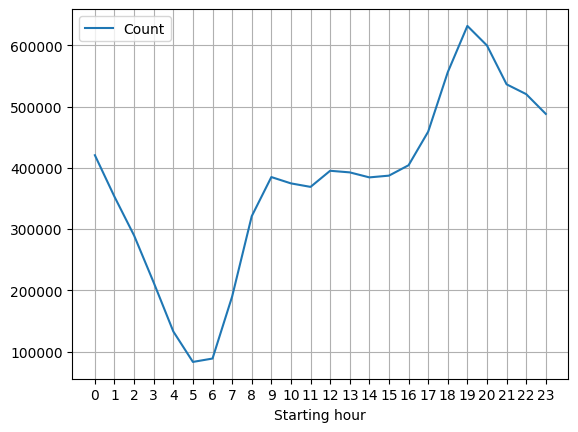

In [19]:
desc.descr_stat(df, columns=["start_time_hourly", "Idle Time Minutes"], group_by=["start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="count", plot=True)
plt.xticks(np.arange(0,24,1))
plt.xlabel("Starting hour")
plt.grid()

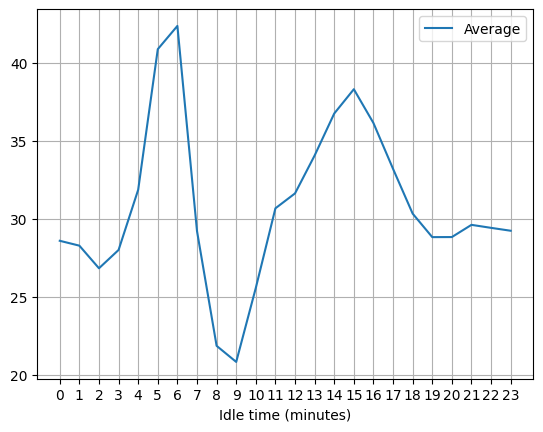

In [20]:
desc.descr_stat(df, columns=["start_time_hourly", "Idle Time Minutes"], group_by=["start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="mean", plot=True)
plt.xticks(np.arange(0,24,1))
plt.xlabel("Starting hour")
plt.xlabel("Idle time (minutes)")
plt.grid()

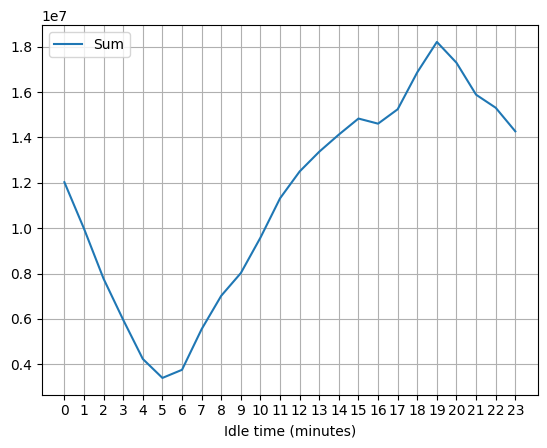

In [21]:
desc.descr_stat(df, columns=["start_time_hourly", "Idle Time Minutes"], group_by=["start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="sum", plot=True)
plt.xticks(np.arange(0,24,1))
plt.xlabel("Starting hour")
plt.xlabel("Idle time (minutes)")
plt.grid()

#### Day Bin size

In [22]:
df['Day_Ordered'] = pd.Categorical(df['dayOfWeek'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

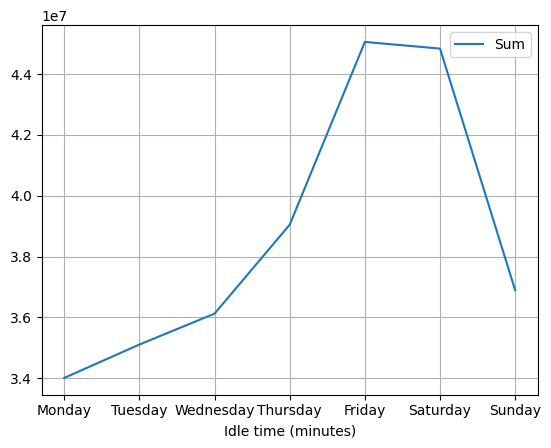

In [23]:
#How many idle time do we have by grouping days in total
desc.descr_stat(df, columns=["Day_Ordered", "Idle Time Minutes"], group_by=["Day_Ordered"], sort=True, sort_by=["Idle Time Minutes"], as_index=True, agg_mode="sum", plot=True)
plt.xlabel("Day")
plt.xlabel("Idle time (minutes)")
plt.grid()

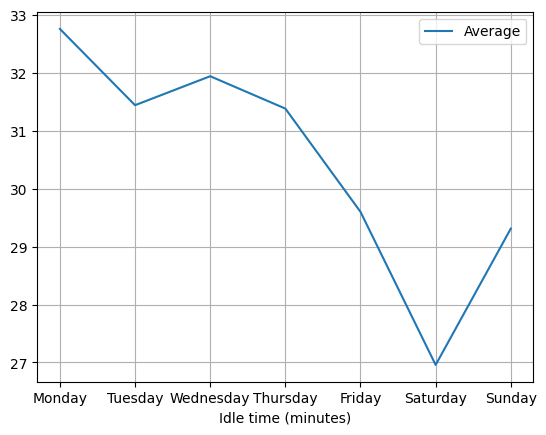

In [24]:
#How many idle time do we have by grouping days on average
desc.descr_stat(df, columns=["Day_Ordered", "Idle Time Minutes"], group_by=["Day_Ordered"], sort=True, sort_by=["Idle Time Minutes"], as_index=True, agg_mode="mean", plot=True)
plt.xlabel("Day")
plt.xlabel("Idle time (minutes)")
plt.grid()

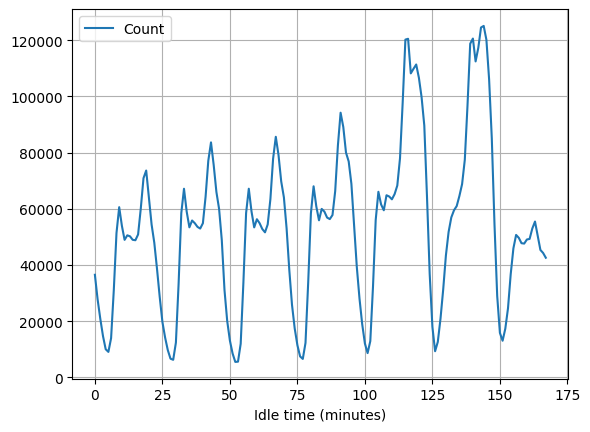

In [25]:
#how many data points for day + hour combination do we have
desc.descr_stat(df, columns=["Day_Ordered", "start_time_hourly", "Idle Time Minutes"], group_by=["Day_Ordered", "start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="count", plot=True)
plt.xlabel("Day")
plt.xlabel("Idle time (minutes)")
plt.grid()

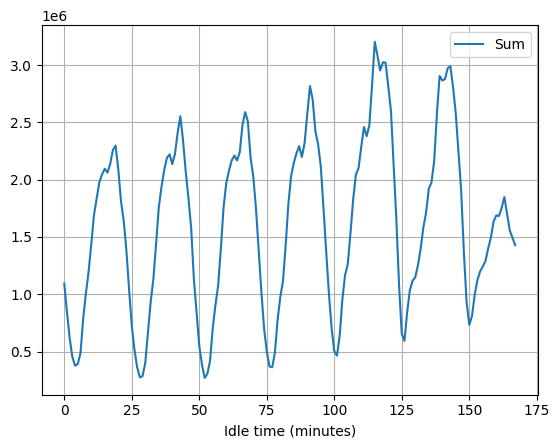

In [26]:
#How many idle time do we have by grouping days and starting hour together
desc.descr_stat(df, columns=["Day_Ordered", "start_time_hourly", "Idle Time Minutes"], group_by=["Day_Ordered", "start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="sum", plot=True)
plt.xlabel("Day")
plt.xlabel("Idle time (minutes)")
plt.grid()

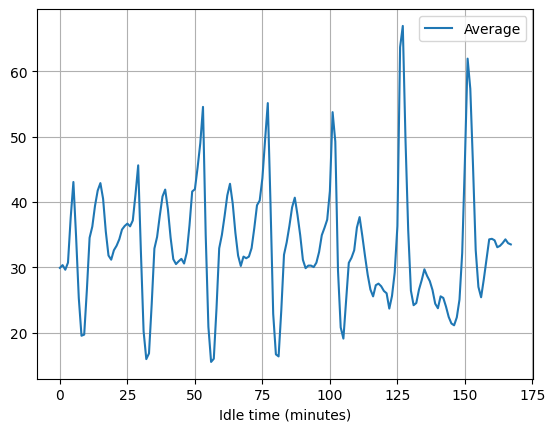

In [27]:
#How many idle time do we have on average by grouping days and starting hour together
desc.descr_stat(df, columns=["Day_Ordered", "start_time_hourly", "Idle Time Minutes"], group_by=["Day_Ordered", "start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="mean", plot=True)
plt.xlabel("Day")
plt.xlabel("Idle time (minutes)")
plt.grid()

#### Week bin size

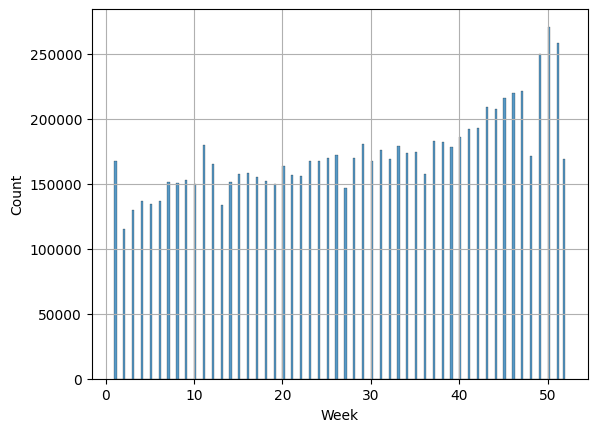

In [28]:
sns.histplot(df["start_time_week"])
plt.xlabel("Week")
plt.grid()

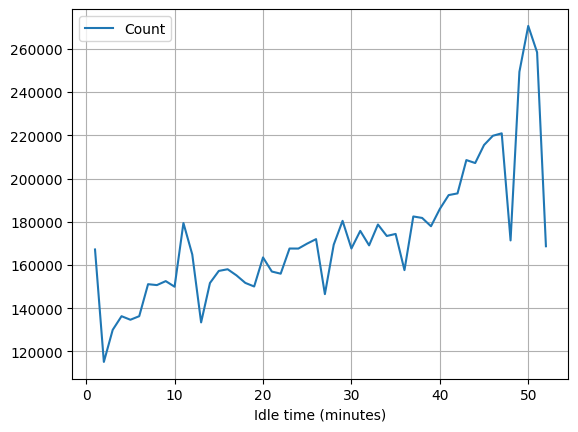

In [29]:
#how many datapoints do we have grouped by the week
desc.descr_stat(df, columns=["start_time_week", "Idle Time Minutes"], group_by=["start_time_week"], sort=True, sort_by=["start_time_week"], agg_mode="count", plot=True)
plt.xlabel("Week")
plt.xlabel("Idle time (minutes)")
plt.grid()

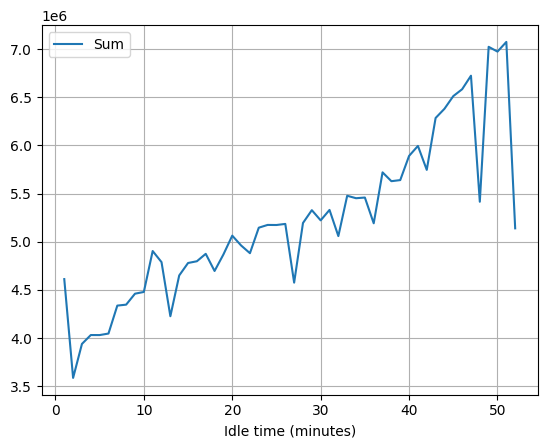

In [30]:
#how many idle time do we have grouped by the week in total
desc.descr_stat(df, columns=["start_time_week", "Idle Time Minutes"], group_by=["start_time_week"], sort=True, sort_by=["start_time_week"], agg_mode="sum", plot=True)
plt.xlabel("Week")
plt.xlabel("Idle time (minutes)")
plt.grid()

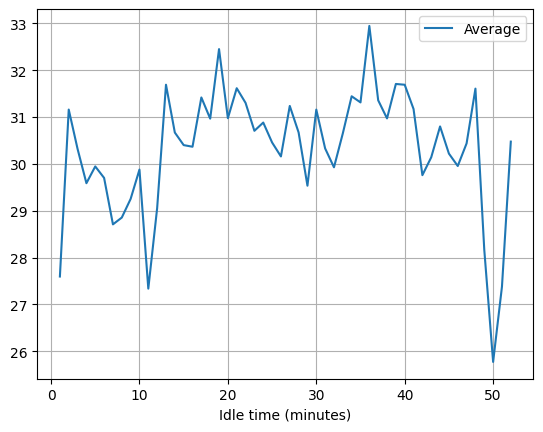

In [31]:
#how many idle time do we have grouped by the week on average
desc.descr_stat(df, columns=["start_time_week", "Idle Time Minutes"], group_by=["start_time_week"], sort=True, sort_by=["start_time_week"], agg_mode="mean", plot=True)
plt.xlabel("Week")
plt.xlabel("Idle time (minutes)")
plt.grid()

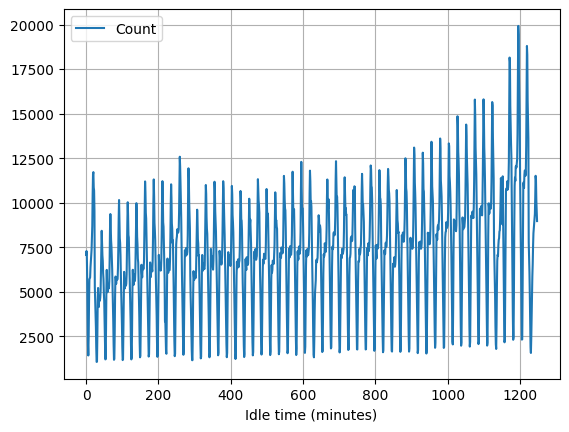

In [32]:
#how many datapoints do we have when grouping by week and hour
desc.descr_stat(df, columns=["start_time_week", "start_time_hourly", "Idle Time Minutes"], group_by=["start_time_week", "start_time_hourly"], sort=True, sort_by=["start_time_week", "start_time_hourly"], as_index=False, agg_mode="count", plot=True)
plt.xlabel("Week")
plt.xlabel("Idle time (minutes)")
plt.grid()

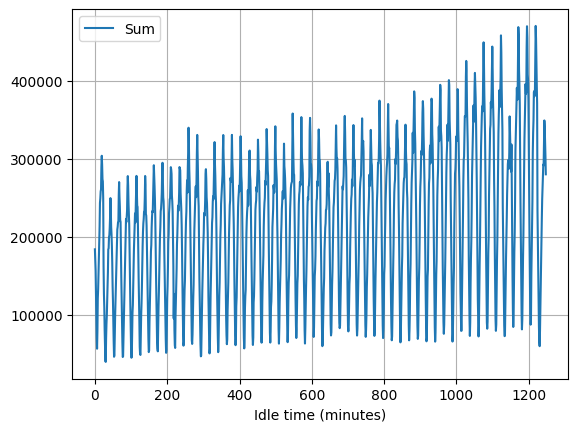

In [33]:
#how many idle time do we have grouped by the week and hour in total
desc.descr_stat(df, columns=["start_time_week", "start_time_hourly", "Idle Time Minutes"], group_by=["start_time_week", "start_time_hourly"], sort=True, sort_by=["start_time_week", "start_time_hourly"], as_index=False, agg_mode="sum", plot=True)
plt.xlabel("Week")
plt.xlabel("Idle time (minutes)")
plt.grid()

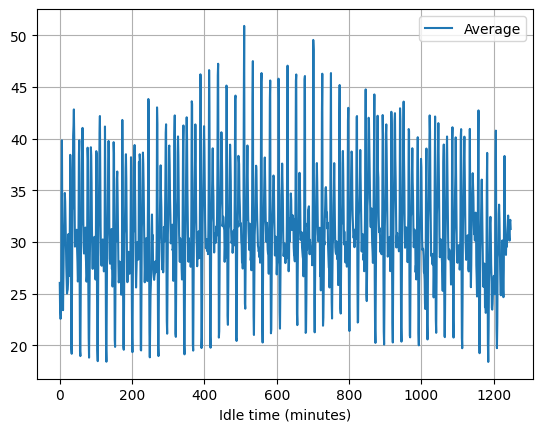

In [34]:
#how many idle time do we have grouped by the week and hour on average
desc.descr_stat(df, columns=["start_time_week", "start_time_hourly", "Idle Time Minutes"], group_by=["start_time_week", "start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="mean", plot=True)
plt.xlabel("Week")
plt.xlabel("Idle time (minutes)")
plt.grid()

#### Month bin size

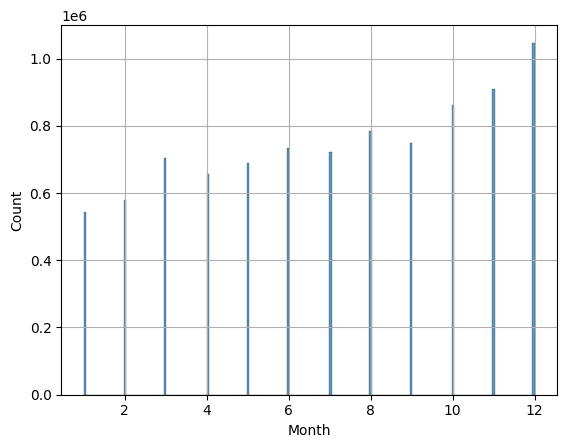

In [35]:
sns.histplot(df["start_time_month"])
plt.xlabel("Month")
plt.grid()

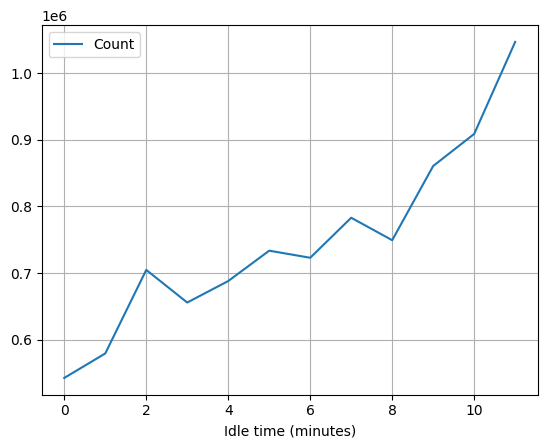

In [36]:
#how many datapoints do we have when grouping by month
desc.descr_stat(df, columns=["start_time_month", "Idle Time Minutes"], group_by=["start_time_month"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="count", plot=True)
plt.xlabel("Month")
plt.xlabel("Idle time (minutes)")
plt.grid()

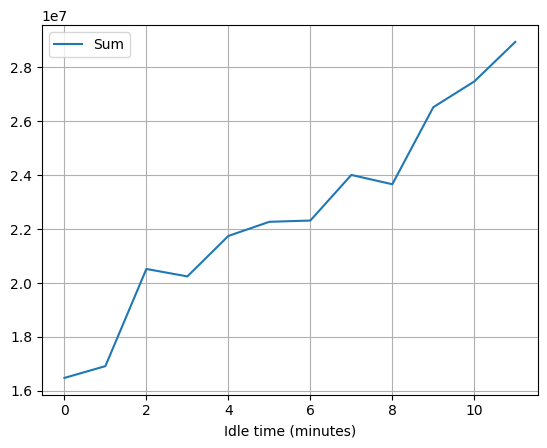

In [37]:
#how many idle time do we have grouped by the month in total
desc.descr_stat(df, columns=["start_time_month", "Idle Time Minutes"], group_by=["start_time_month"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="sum", plot=True)
plt.xlabel("Month")
plt.xlabel("Idle time (minutes)")
plt.grid()

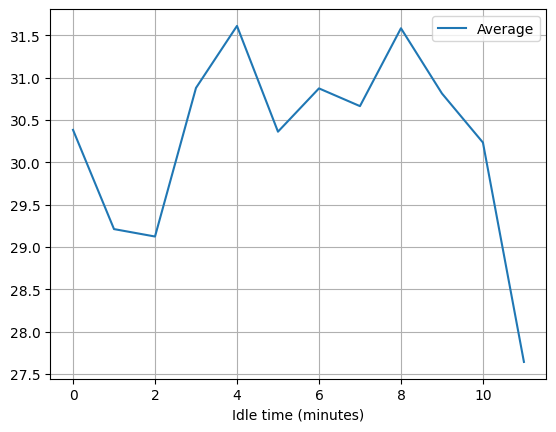

In [38]:
#how many idle time do we have grouped by the month on average
desc.descr_stat(df, columns=["start_time_month", "Idle Time Minutes"], group_by=["start_time_month"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="mean", plot=True)
plt.xlabel("Month")
plt.xlabel("Idle time (minutes)")
plt.grid()

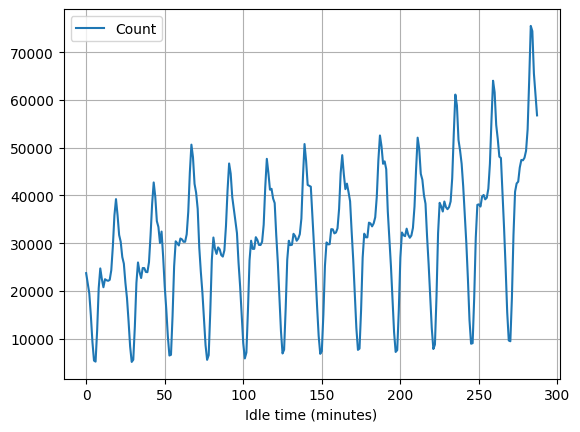

In [39]:
#how many datapoints do we have grouped by the month
desc.descr_stat(df, columns=["start_time_month", "start_time_hourly", "Idle Time Minutes"], group_by=["start_time_month", "start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="count", plot=True)
plt.xlabel("Month")
plt.xlabel("Idle time (minutes)")
plt.grid()

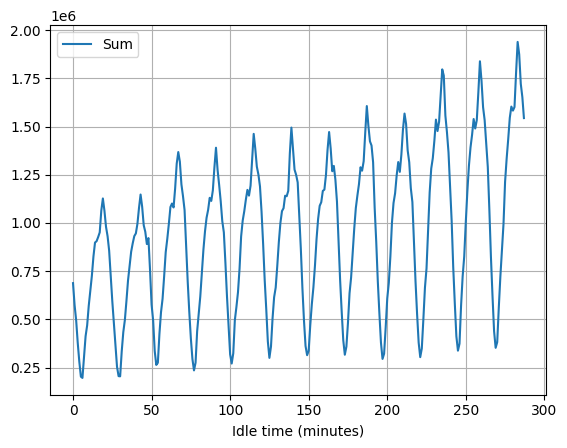

In [40]:
#how many idle time do we have grouped by the month and hour in total
desc.descr_stat(df, columns=["start_time_month", "start_time_hourly", "Idle Time Minutes"], group_by=["start_time_month", "start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="sum", plot=True)
plt.xlabel("Month")
plt.xlabel("Idle time (minutes)")
plt.grid()

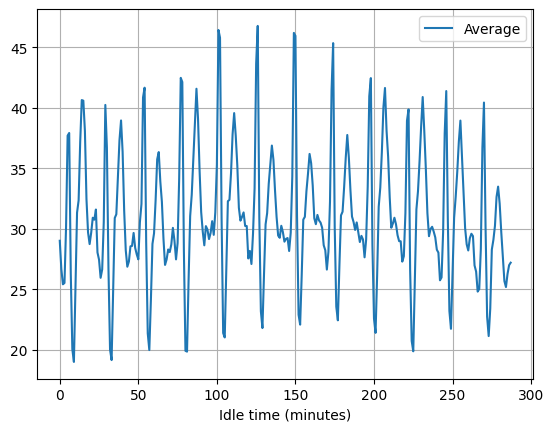

In [41]:
#how many idle time do we have grouped by the month and hour on average
desc.descr_stat(df, columns=["start_time_month", "start_time_hourly", "Idle Time Minutes"], group_by=["start_time_month", "start_time_hourly"], sort=True, sort_by=["Idle Time Minutes"], as_index=False, agg_mode="mean", plot=True)
plt.xlabel("Month")
plt.xlabel("Idle time (minutes)")
plt.grid()